<a href="https://colab.research.google.com/github/Henriquerezer/Dissertacao/blob/main/Abordagem_de_classifica%C3%A7%C3%A3o_(_3_CLASSES).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importação de bibliotecas necessárias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import  train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, recall_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from imblearn.over_sampling import SMOTE

In [2]:
treino = pd.read_excel('/content/Treino (2).xlsx')
treino['TEMP'] = treino['TEMP'].str.replace("?", "")
treino['HUMIDADE'] = treino['HUMIDADE'].str.replace("%", "")
treino['TEMP'] = treino['TEMP'].astype(float)
treino['HUMIDADE'] = treino['HUMIDADE'].astype(float)
# Função para definir o valor da nova coluna com base nas condições

def definir_valor_nova_coluna(valor):
    if 353 >= valor >= 181:
        return  1    #'hiperglicemia'
    elif 180 >= valor >= 71:
        return 2     #  'normogllicemia'
    elif 70 >= valor >= 0:
      return 3       #'hipoglicemia'
    else:
        return None  # Ou qualquer valor padrão para casos que não se encaixem nas condições

# Criar a nova coluna usando a função apply
treino['categorica'] = treino['mg/dL'].apply(definir_valor_nova_coluna)
treino = treino.drop('mg/dL', axis = 1)
treino = treino.dropna()

<ipython-input-2-e0e77dd8d0a9>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  treino['TEMP'] = treino['TEMP'].str.replace("?", "")


In [3]:
X = treino.drop('categorica', axis=1)
y = treino['categorica']

# Passo 1: Separar os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Passo 2: Aplicar SMOTE para balancear as classes no conjunto de treino
smote = SMOTE(random_state=42, sampling_strategy='all', k_neighbors=2)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

model = ExtraTreesClassifier(max_depth = 10, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 200, criterion='entropy')

# Definir o número de folds para a validação cruzada
num_folds = 6

# Realizar a validação cruzada
scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=num_folds, scoring='accuracy')

# Treinar o modelo com todos os dados de treinamento
model.fit( X_train_resampled, y_train_resampled)


y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

#print(f"Metrics for {model_name}:")
print(f"Accuracy: {acc:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")

Accuracy: 0.9483
F1 Score: 0.9473
Recall: 0.9483


/usr/local/lib/python3.10/dist-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


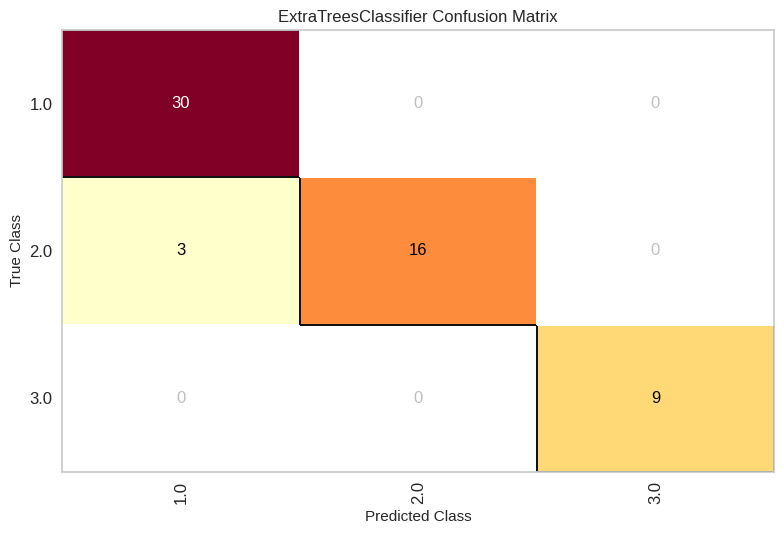

<Axes: title={'center': 'ExtraTreesClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [4]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(model)

cm.score( X_test, y_test)
plt.savefig('EXTRA TREE 3 classes VALIDAÇÃO.png')
cm.show()

# TESTE

In [5]:
data = pd.read_excel('/content/teste (2).xlsx')
data['TEMP'] = data['TEMP'].str.replace("?", "")
data['HUMIDADE'] = data['HUMIDADE'].str.replace("%", "")
data = data.dropna()
data['TEMP'] = data['TEMP'].astype(float)
data['HUMIDADE'] = data['HUMIDADE'].astype(float)
data.head()

def definir_valor_nova_coluna(valor):
    if 353 >= valor >= 181:
        return 1  #   'hiperglicemia'
    elif 180 >= valor >= 71:
        return 2  # 'normoglicemia'
    elif 70 >= valor >= 0:
      return 3    # 'hipoglicemia'
    else:
        return None  # Ou qualquer valor padrão para casos que não se encaixem nas condições

# Criar a nova coluna usando a função apply
data['categorica'] = data['mg/dL'].apply(definir_valor_nova_coluna)
data = data.drop('mg/dL', axis = 1)
data = data.dropna()

<ipython-input-5-b8d1c2685b63>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['TEMP'] = data['TEMP'].str.replace("?", "")


In [6]:
X = data.drop('categorica', axis=1)
y = data['categorica']

y_pred = model.predict(X)

acc = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')
#print(f"Metrics for {model_name}:")
print(f"Accuracy: {acc:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")

Accuracy: 0.9778
F1 Score: 0.9776
Recall: 0.9778


/usr/local/lib/python3.10/dist-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


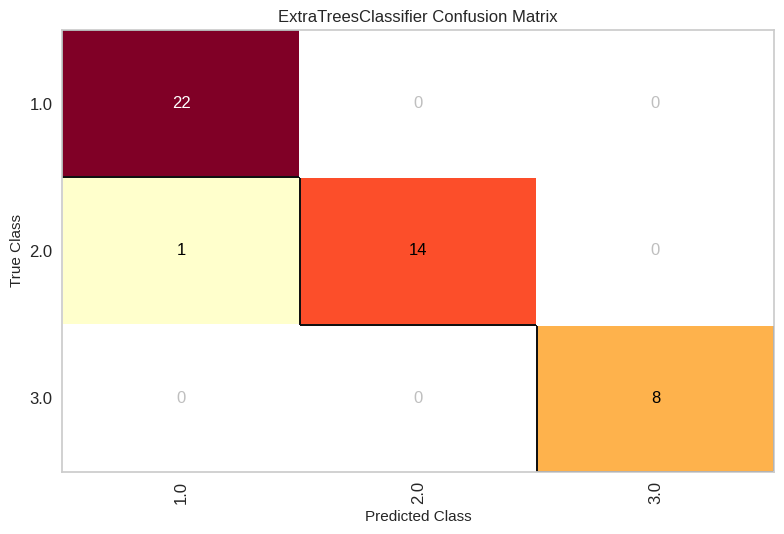

<Axes: title={'center': 'ExtraTreesClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [7]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(model)

cm.score(X, y)
plt.savefig('EXTRA TREE 3 classes teste.png')
cm.show()

# NOVAS LEITURAS

In [9]:
novas_leituras = pd.read_excel('/content/teste_final.xlsx')
novas_leituras['TEMP'] = novas_leituras['TEMP'].str.replace("?", "")
novas_leituras['HUMIDADE'] = novas_leituras['HUMIDADE'].str.replace("%", "")
novas_leituras['TEMP'] = novas_leituras['TEMP'].astype(float)
novas_leituras['HUMIDADE'] = novas_leituras['HUMIDADE'].astype(float)

def definir_valor_nova_coluna(valor):
    if 393 >= valor >= 181:
        return 1  #   'hiperglicemia'
    elif 180 >= valor >= 71:
        return 2  # 'normoglicemia'
    elif 70 >= valor >= 0:
      return 3    # 'hipoglicemia'
    else:
        return None  # Ou qualquer valor padrão para casos que não se encaixem nas condições

# Criar a nova coluna usando a função apply
novas_leituras['categorica'] = novas_leituras['mg/dL'].apply(definir_valor_nova_coluna)
novas_leituras = novas_leituras.drop('mg/dL', axis = 1)
novas_leituras = novas_leituras.dropna()

<ipython-input-9-1c1470f2e7f5>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  novas_leituras['TEMP'] = novas_leituras['TEMP'].str.replace("?", "")


In [10]:
X = novas_leituras.drop('categorica', axis=1)
y = novas_leituras['categorica']

y_pred = model.predict(X)

acc = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')

print(acc)

0.8947368421052632


/usr/local/lib/python3.10/dist-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


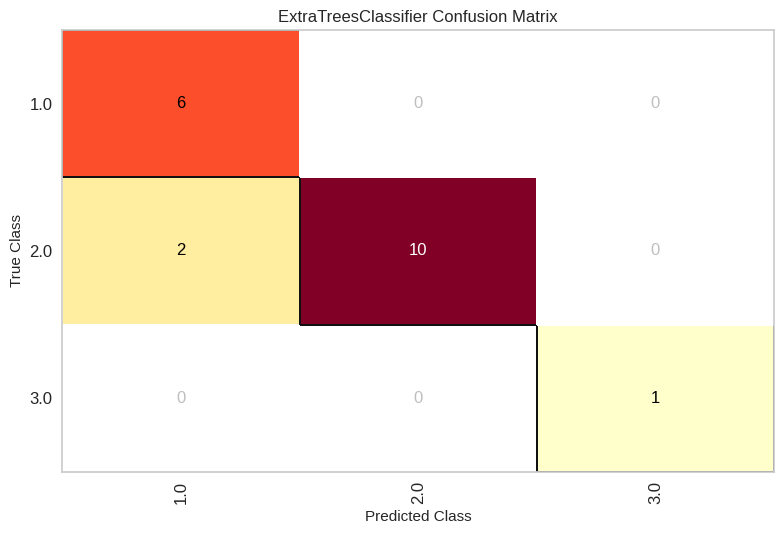

<Axes: title={'center': 'ExtraTreesClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [11]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(model)

cm.score(X, y)
plt.savefig('EXTRA TREE 3 classes novas leituras.png')
cm.show()